**Dataset From **

Walmart Sales : https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast

Walmart Daily Stock Prices : https://www.kaggle.com/datasets/amandam1/walmart-stock-20122016/data

Financial Indicators of US : https://www.kaggle.com/datasets/mikoajfish99/us-recession-and-financial-indicators?select=Personal+Saving+Rate.csv


**df_all**


1.   Weekly_Sales : ยอดขายร้านค้า
2.   Temperature : อุณหภูมิเฉลี่ยในประเทศ(F)
3.   Fuel_Price : ราคาพลังงานเชื้อเพลิง
4.   CPI : ดัชนีราคาผู้บริโภค
5.   Unemployment : อัตราการว่างงาน
6.   Type : ประเภทของร้านค้า
7.   Size : ขนาดของร้านค้า
8.   Close : ราคาหุ้นปิดของวัน
9.   GDP : ผลิตภัณฑ์มวลรวมภายในประเทศ
10.   PSAVERT : อัตราการออมส่วนบุคคล
11.   DFF : อัตราดอกเบี้ยนโยบายของสหรัฐ  







In [80]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose


import warnings
warnings.filterwarnings("ignore")

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#data internal
df_store = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS1/Walmart Sales Forecasting/stores.csv') #store data
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS1/Walmart Sales Forecasting/train.csv') # train set
df_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS1/Walmart Sales Forecasting/features.csv') #external information
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')

In [83]:
#data external
df_stockprice = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS1/Walmart Sales Forecasting/WMT.csv') #store data
df_gdp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS1/Walmart Sales Forecasting/Gross Domestic Product.csv')
df_cpi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS1/Walmart Sales Forecasting/Consumer Price Index.csv')
df_unemploy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS1/Walmart Sales Forecasting/Unemployment Rate.csv')
df_psr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS1/Walmart Sales Forecasting/Personal Saving Rate.csv')
df_fed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS1/Walmart Sales Forecasting/Federal Funds Effective Rate.csv')

In [84]:
# แปลงข้อมูล DATE เป็นรูปแบบ YYYY-MM-DD
df_fed['DATE'] = pd.to_datetime(df_fed['DATE'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

In [85]:
#แปลงคอลัมน์ให้เป็นคำว่า "Date" ให้เหมือนกันทุก dataframe
df["Date"] = pd.to_datetime(df["Date"])#.dt.to_period('D')
df_stockprice["Date"] = pd.to_datetime(df_stockprice["Date"])#.dt.to_period('D')
df_gdp["Date"] = pd.to_datetime(df_gdp["DATE"])#.dt.to_period('D')
df_cpi["Date"] = pd.to_datetime(df_cpi["DATE"])#.dt.to_period('D')
df_unemploy["Date"] = pd.to_datetime(df_unemploy["DATE"])#.dt.to_period('D')
df_psr["Date"] = pd.to_datetime(df_psr["DATE"])#.dt.to_period('D')
df_fed["Date"] = pd.to_datetime(df_fed["DATE"])#.dt.to_period('D')

In [86]:
#ทำการลบคอลัมน์ที่ชื่อ 'DATE'
df_gdp.drop(columns=['DATE'], inplace=True)
df_cpi.drop(columns=['DATE'], inplace=True)
df_unemploy.drop(columns=['DATE'], inplace=True)
df_psr.drop(columns=['DATE'], inplace=True)
df_fed.drop(columns=['DATE'], inplace=True)

In [87]:
df = df.drop(['Store','Dept','IsHoliday_x','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','IsHoliday_y','Type'], axis =1)

In [88]:
#Filter data
df_stockprice = df_stockprice[df_stockprice['Date'] >= '2010-02-01']
df_gdp = df_gdp[df_gdp['Date'] >= '2010-01-01']
df_cpi = df_cpi[df_cpi['Date'] >= '2010-02-01']
df_unemploy = df_unemploy[df_unemploy['Date'] >= '2010-02-01']
df_psr = df_psr[df_psr['Date'] >= '2010-02-01']
df_fed = df_fed[df_fed['Date'] >= '2010-02-01']

In [89]:
#Filter data
df_stockprice = df_stockprice[df_stockprice['Date'] <= '2012-12-30']
df_gdp = df_gdp[df_gdp['Date'] <= '2013-01-30']
df_cpi = df_cpi[df_cpi['Date'] <= '2012-12-30']
df_unemploy = df_unemploy[df_unemploy['Date'] <= '2012-12-30']
df_psr = df_psr[df_psr['Date'] <= '2012-12-30']
df_fed = df_fed[df_fed['Date'] <= '2012-12-30']

In [90]:
#Set index เป็น Date
df.set_index('Date', inplace=True)
df_fed.set_index('Date', inplace=True)
df_stockprice.set_index('Date', inplace=True)
df_gdp.set_index('Date', inplace=True)
df_cpi.set_index('Date', inplace=True)
df_unemploy.set_index('Date', inplace=True)
df_psr.set_index('Date', inplace=True)

In [91]:
#นำค่า Mean มาเป็น
df_week = df.resample('W').mean()
df_stockprice = df_stockprice.resample('W').mean()
df_gdp = df_gdp.resample('W').mean()
df_psr = df_psr.resample('W').mean()
df_fed = df_fed.resample('W').mean()

In [92]:
# Fill ค่า NaN ในแต่ละสามเดือนจะมีค่าเท่ากัน
df_gdp = df_gdp.fillna(method='ffill')
df_psr = df_psr.fillna(method='ffill')

In [93]:
#ลบข้อมูลให้ df_gdp เริ่มที่เดืออนกุมภาพันธ์
df_gdp = df_gdp.iloc[5:]

In [94]:
#Merge Stockprice + economy
df_stockprice = df_stockprice.merge(df_gdp, on=['Date'], how='inner').merge(df_psr, on=['Date'], how='inner').merge(df_fed, on=['Date'], how='inner')

In [95]:
#แปลง Date ที่เป็น index มาเป็น attribute
df_week = df_week.reset_index()
df_stockprice = df_stockprice.reset_index()

In [96]:
#นำข้อมูล 2 df merge left join ให้เป็นตาราง df_week
df_all = pd.merge(df_week, df_stockprice, on='Date', how='left')

In [97]:
# Drop คอลัมน์ดังกล่าวเนื่องจากลดความคลาดเคลื่อนในการทำนาย
df_all = df_all.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume','Temperature','Size'], axis =1)

In [98]:
df_all.to_csv('df_all.csv', index=False)

In [99]:
#Set 'Date' เป็น index
df_all.set_index('Date', inplace=True)

In [100]:
df_all.head(2)

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Close,GDP,PSAVERT,DFF
Date,,,,,,,,
2010-02-07,16836.121997,2.717869,167.398405,8.576731,53.532001,14764.611,5.6,0.134286
2010-02-14,16352.056032,2.696102,167.384138,8.567309,53.080001,14764.611,5.6,0.122857


#Overview

<Axes: xlabel='Date'>

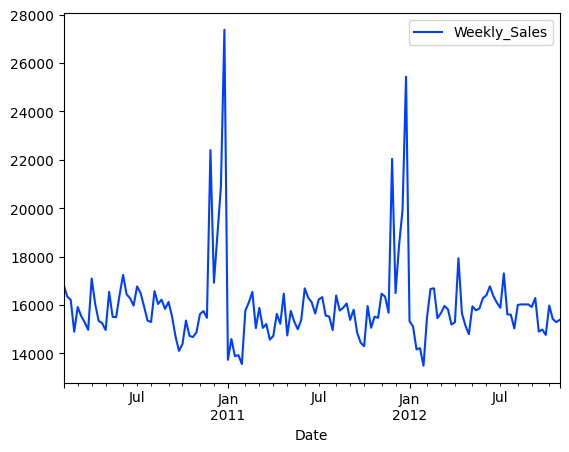

In [101]:
Sales = pd.pivot_table(df_all, values = "Weekly_Sales", index= "Date")
Sales.plot()

<Axes: xlabel='Date'>

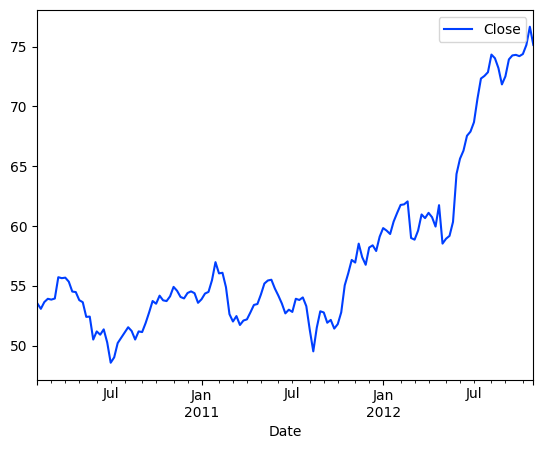

In [102]:
Close = pd.pivot_table(df_all, values = "Close", index= "Date")
Close.plot()

<Axes: xlabel='Date'>

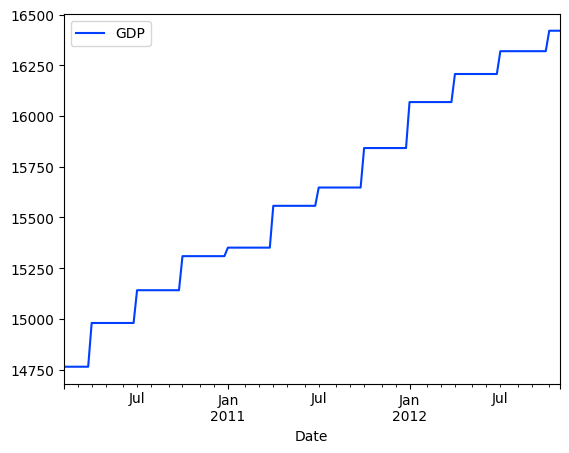

In [103]:
GDP = pd.pivot_table(df_all, values = "GDP", index= "Date")
GDP.plot()

<Axes: xlabel='Date'>

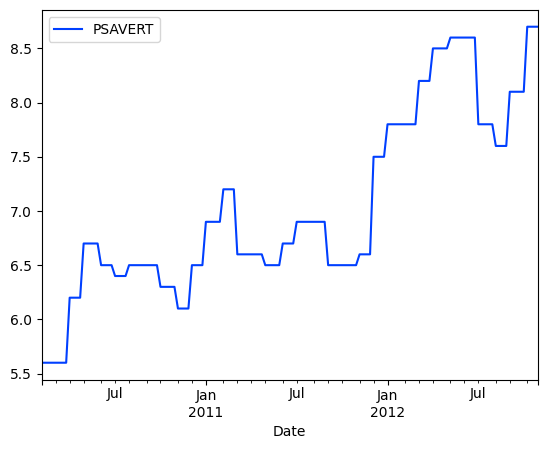

In [104]:
PSAVERT	= pd.pivot_table(df_all, values = "PSAVERT", index= "Date")
PSAVERT.plot()

<Axes: xlabel='Date'>

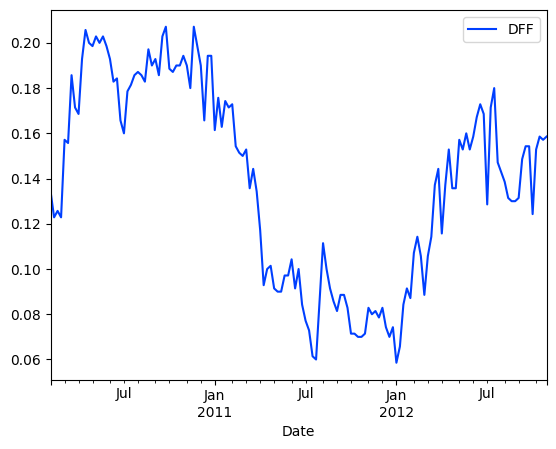

In [105]:
DFF = pd.pivot_table(df_all, values = "DFF", index= "Date")
DFF.plot()

<Axes: xlabel='Date'>

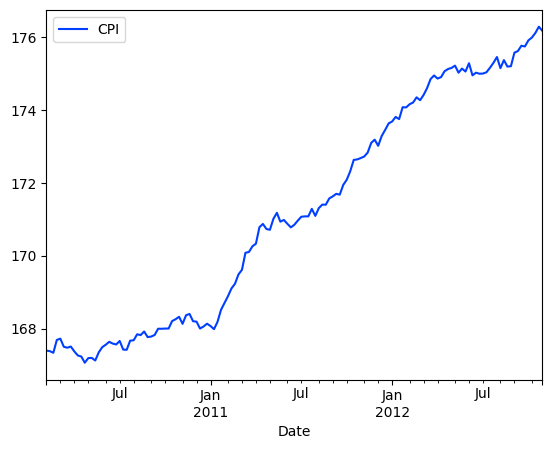

In [106]:
CPI = pd.pivot_table(df_all, values = "CPI", index= "Date")
CPI.plot()

<Axes: xlabel='Date'>

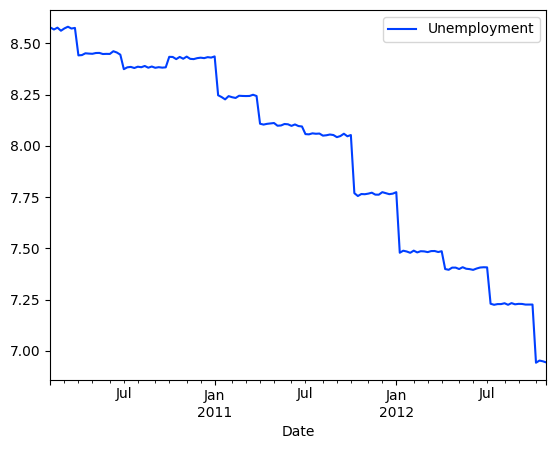

In [107]:
Unemployment = pd.pivot_table(df_all, values = "Unemployment", index= "Date")
Unemployment.plot()

<Axes: xlabel='Date'>

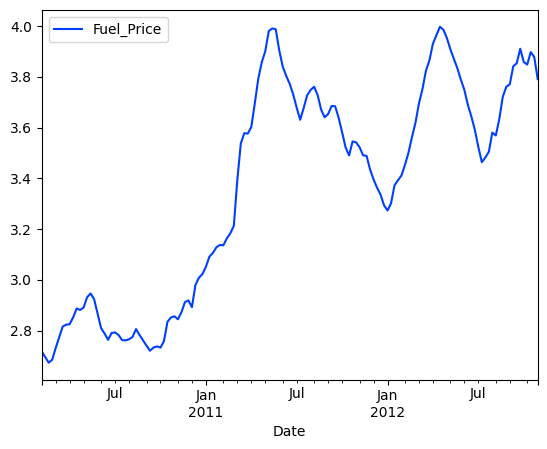

In [108]:
Fuel_Price = pd.pivot_table(df_all, values = "Fuel_Price", index= "Date")
Fuel_Price.plot()

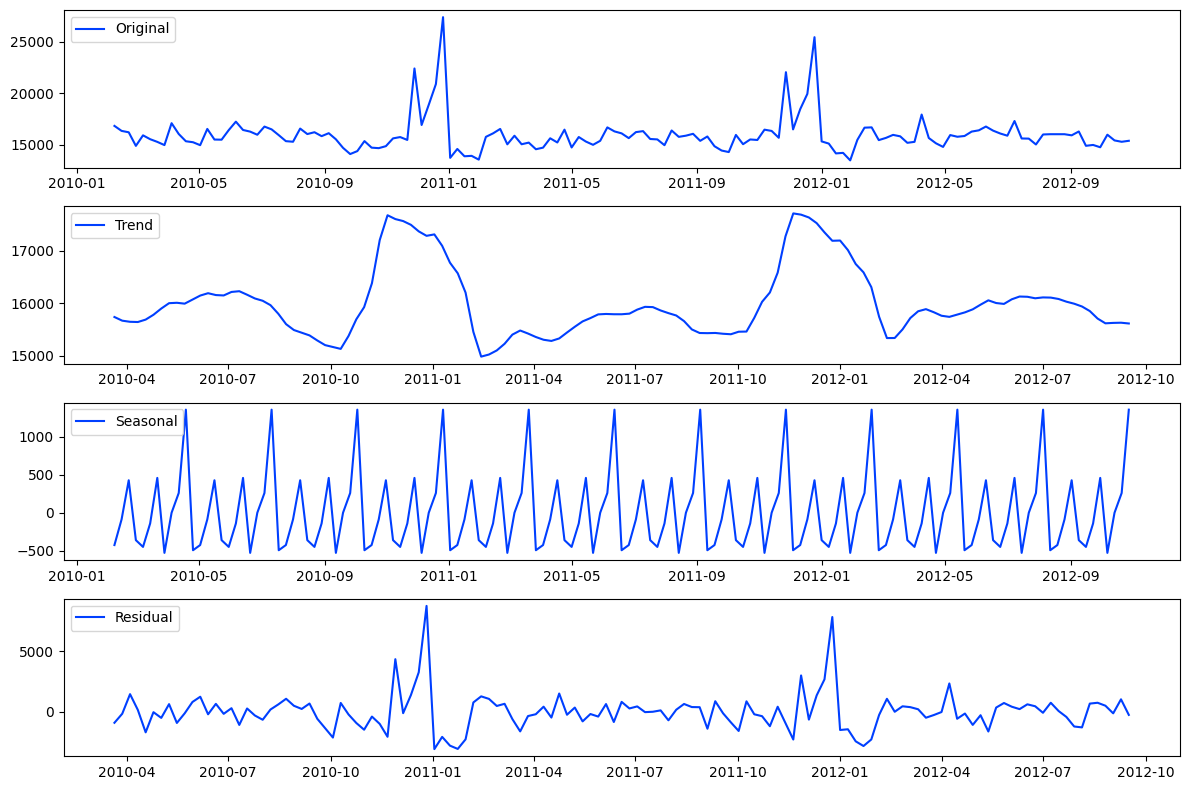

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
# ทำการ Decompose เป็น Trend, Seasonal, และ Residual
decomposition = seasonal_decompose(df_all['Weekly_Sales'], model='additive', period=12)  # ตั้งค่า period เป็น 12 เพราะมีการวิเคราะห์ตามรอบเดือน

# แสดงกราฟแยกแต่ละส่วน
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_all['Weekly_Sales'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#Feature Selection

In [110]:
from sklearn.feature_selection import SelectKBest, f_regression

# เลือกคุณลักษณะที่ดีที่สุดโดยใช้ SelectKBest
def select_best_features(X_train, y_train, k=2):
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X_train, y_train)
    selected_features_indices = selector.get_support(indices=True)
    return X_selected, selected_features_indices

# แบ่งข้อมูลเป็นชุด train และ test
train_size = int(len(df_all) * 0.8)
train_data, test_data = df_all[:train_size], df_all[train_size:]

# แบ่งข้อมูล train test โดยมี 1 คอลัมน์เป้น target
X_train = train_data.drop(columns=['Weekly_Sales'])
y_train = pd.DataFrame(train_data['Weekly_Sales'])
X_test = test_data.drop(columns=['Weekly_Sales'])
y_test = pd.DataFrame(test_data['Weekly_Sales'])

# เลือกคุณลักษณะที่ดีที่สุดจากข้อมูล train
X_train_selected, selected_features_indices = select_best_features(X_train, y_train)

# แสดงคุณลักษณะที่ถูกเลือก
selected_features = X_train.columns[selected_features_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['Fuel_Price', 'Close'], dtype='object')


In [111]:
# Drop คอลัมน์ดังกล่าวเนื่องจากลดความคลาดเคลื่อนในการทำนาย
df_all = df_all.drop(['Unemployment','PSAVERT','DFF'], axis =1)

#VAR

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-bright')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VECM
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
import scipy
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base import  datetools

##Weekly_Sales

###Autocorrelation and Partial Autocorrelation:

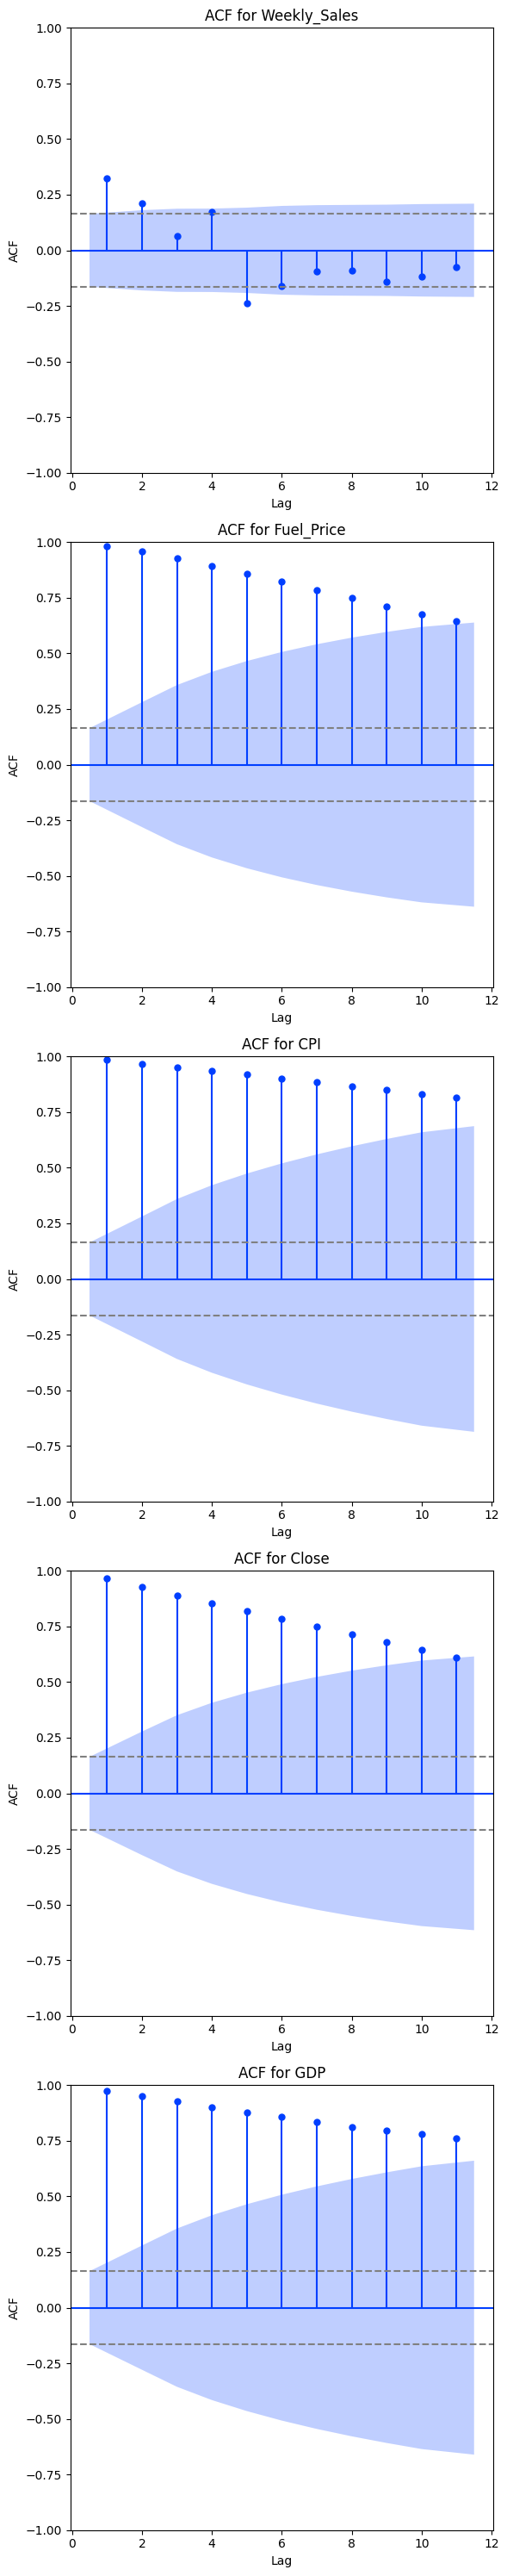

In [113]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt
col_list = ['Weekly_Sales','Fuel_Price', 'CPI', 'Close', 'GDP']
fig, axes = plt.subplots(nrows=len(col_list), ncols=1, figsize=(6,30))
for i, col in enumerate(col_list):
  sgt.plot_acf(df_all[col], lags=11, zero=False, ax=axes[i])
  axes[i].axhline(y=1.96/np.sqrt(len(df_all[col])), linestyle='--', color='gray')
  axes[i].axhline(y=-1.96/np.sqrt(len(df_all[col])), linestyle='--', color='gray')
  axes[i].set_title('ACF for %s' % col)
  axes[i].set_xlabel('Lag')
  axes[i].set_ylabel('ACF')
plt.tight_layout()
plt.show()

**Partial Autocorrelation Function (PACF)**

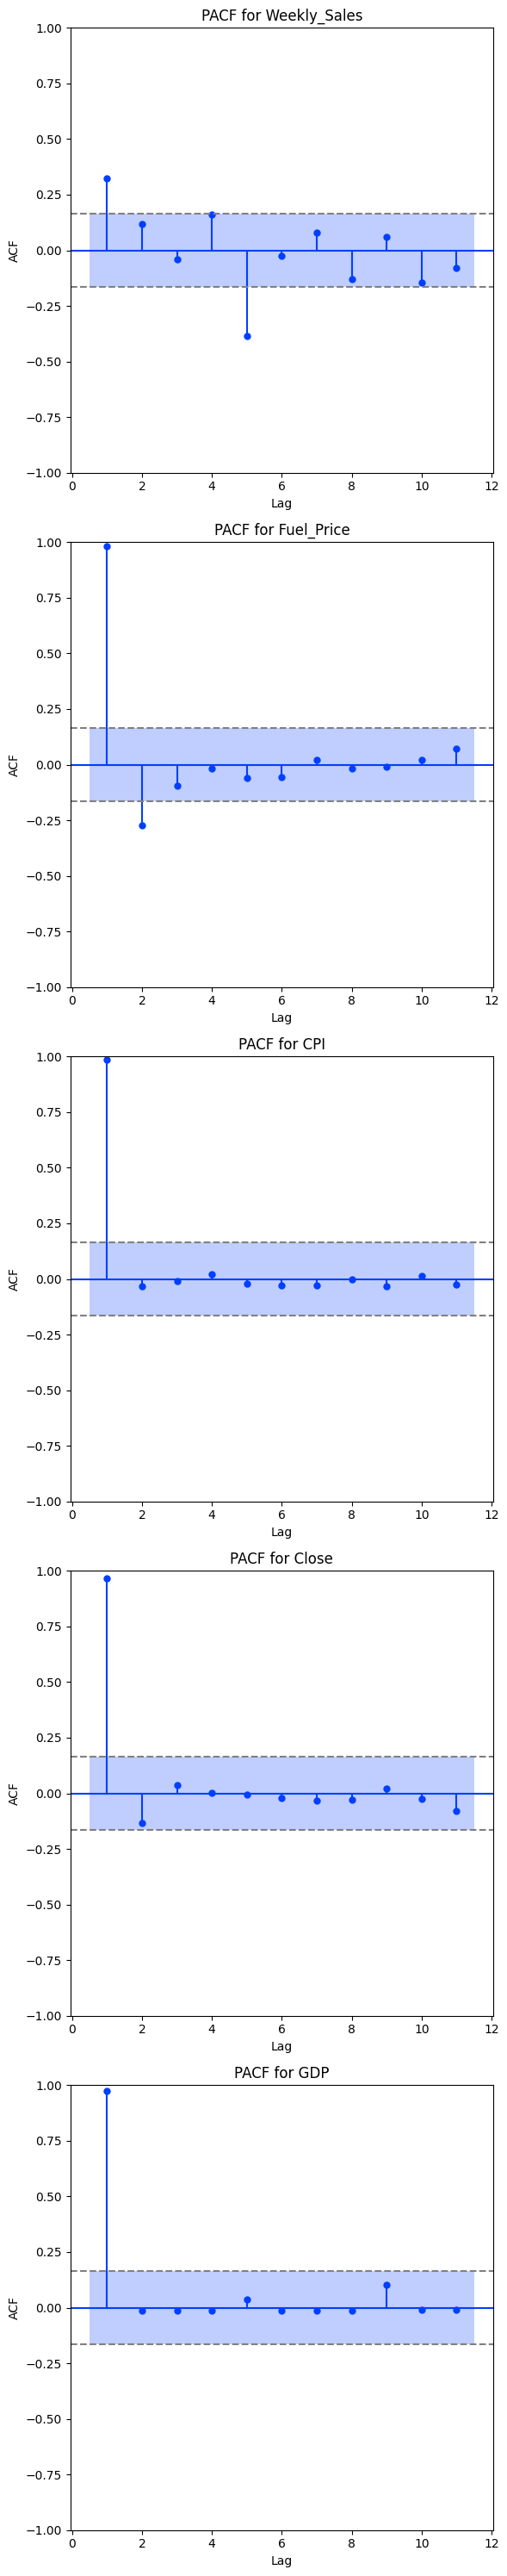

In [114]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt
col_list = ['Weekly_Sales','Fuel_Price', 'CPI', 'Close', 'GDP']
fig, axes = plt.subplots(nrows=len(col_list), ncols=1, figsize=(6,30))
for i, col in enumerate(col_list):
  sgt.plot_pacf(df_all[col], lags=11, zero=False, ax=axes[i])
  axes[i].axhline(y=1.96/np.sqrt(len(df_all[col])), linestyle='--', color='gray')
  axes[i].axhline(y=-1.96/np.sqrt(len(df_all[col])), linestyle='--', color='gray')
  axes[i].set_title('PACF for %s' % col)
  axes[i].set_xlabel('Lag')
  axes[i].set_ylabel('ACF')
plt.tight_layout()
plt.show()

###Test stationarity

**The Augmented Dickey-Fuller (ADF)** เพื่อให้เห็นความสัมพันธ์ระหว่างค่าในช่วงเวลาที่แตกต่าง

In [115]:
from statsmodels.tsa.stattools import adfuller
adf_results = pd.DataFrame(columns=['p-value', 'Is the series Stationary?'], index=df_all.columns)
for col in df_all.columns:
    result = adfuller(df_all[col])
    pvalue = result[1]
    if pvalue < 0.05:
        adf_results.loc[col] = [pvalue, True]
    else:
        adf_results.loc[col] = [pvalue, False]
adf_results

,p-value,Is the series Stationary?
Weekly_Sales,0.0,True
Fuel_Price,0.6474,False
CPI,0.990089,False
Close,0.9834,False
GDP,0.903749,False


In [116]:
size=int(len(df_all) * 0.80)
df_all_train = df_all.iloc[:size]
df_all_test = df_all.iloc[size:]

###Optimal Lag Length

###Granger-causality test

In [117]:
lag = int(((int(len(df_all_train.index))) / 3) / int(len(df_all_train.columns)))
lag

7

In [118]:
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
  df_all = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in df_all.columns:
      for r in df_all.index:
          test_result = sts.grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
          p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
          if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
          min_p_value = np.min(p_values)
          df_all.loc[r, c] = min_p_value
  df_all.columns = [var + '_x' for var in variables]
  df_all.index = [var + '_y' for var in variables]
  return df_all

In [119]:
granger=grangers_causation_matrix(df_all_train, variables = df_all_train.columns)

**causes and effects**

In [120]:
for column in granger.columns:
    for index, value in granger[column].items():
        if value < 0.05 and index != column:
            print(f"{index} is caused by {column}")

Close_y is caused by CPI_x
GDP_y is caused by CPI_x
Fuel_Price_y is caused by Close_x
Close_y is caused by GDP_x


In [121]:
var_model = VAR(endog=df_all_train)
res_var = var_model.select_order(maxlags=2, trend='ct')
res_var.summary()
#AIC = Akaike Information Criterion

,AIC,BIC,FPE,HQIC
0,20.94,21.18,1.244e+09,21.04
1,12.28,13.13*,2.159e+05,12.63*
2,12.09*,13.54,1.780e+05*,12.68


**ฝึกโมเดล**

In [122]:
var_model_fit = var_model.fit(maxlags=2, ic='aic')
var_model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 26, Apr, 2024
Time:                     17:41:33
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    13.5435
Nobs:                     112.000    HQIC:                   12.7502
Log likelihood:          -1423.28    FPE:                    201135.
AIC:                      12.2086    Det(Omega_mle):         125908.
--------------------------------------------------------------------
Results for equation Weekly_Sales
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const               10189.626282     30682.285790            0.332           0.740
L1.Weekly_Sales         0.248020         0.101129            2.453           0.014
L1.Fuel_Price       -3792.828077      4526.81

In [123]:
 #Get the lag order
lag_order = var_model_fit.k_ar
print(lag_order)

2


In [124]:
 #Input data for forecasting
pred_input = df_all_train.values[lag_order:]
pred_input

array([[1.62166590e+04, 2.67366644e+00, 1.67338966e+02, 5.36450012e+01,
        1.47646110e+04],
       [1.48995497e+04, 2.68564216e+00, 1.67691019e+02, 5.39180002e+01,
        1.47646110e+04],
       [1.59210157e+04, 2.73181590e+00, 1.67727351e+02, 5.38500000e+01,
        1.47646110e+04],
       [1.55468505e+04, 2.77445193e+00, 1.67504162e+02, 5.39420014e+01,
        1.47646110e+04],
       [1.52867736e+04, 2.81606252e+00, 1.67478101e+02, 5.57219994e+01,
        1.47646110e+04],
       [1.49758945e+04, 2.82360977e+00, 1.67510338e+02, 5.56419998e+01,
        1.47646110e+04],
       [1.70986203e+04, 2.82545270e+00, 1.67377836e+02, 5.56850005e+01,
        1.49801930e+04],
       [1.60505898e+04, 2.85242291e+00, 1.67265977e+02, 5.53500002e+01,
        1.49801930e+04],
       [1.53477130e+04, 2.88735802e+00, 1.67236170e+02, 5.45240004e+01,
        1.49801930e+04],
       [1.52521147e+04, 2.88163280e+00, 1.67065968e+02, 5.44800002e+01,
        1.49801930e+04],
       [1.49675091e+04, 2.8914

In [125]:
 #Forecasting
var_pred = var_model_fit.forecast(y=pred_input, steps=len(df_all_test))
df_var_pred = pd.DataFrame(var_pred, index = df_all_test.index, columns = df_all_train.columns + '_1d')
df_var_pred.head()

,Weekly_Sales_1d,Fuel_Price_1d,CPI_1d,Close_1d,GDP_1d
Date,,,,,
2012-04-15,16943.923433,3.984502,174.996079,60.548617,16218.049686
2012-04-22,16943.711425,4.008383,175.074114,60.299166,16229.625214
2012-04-29,16812.730525,4.030360,175.161313,60.115120,16240.525805
2012-05-06,16740.463996,4.051026,175.252688,59.968702,16251.916554
2012-05-13,16678.700417,4.070252,175.348028,59.860222,16263.689357


**ประมวลผล**

In [126]:
# Calcuate metrics
score_mae = mean_absolute_error(df_all_test['Weekly_Sales'], df_var_pred['Weekly_Sales_1d'])
score_mse = mean_squared_error(df_all_test['Weekly_Sales'], df_var_pred['Weekly_Sales_1d'])
score_rmse = mean_squared_error(df_all_test['Weekly_Sales'], df_var_pred['Weekly_Sales_1d'])
score_mape = mean_absolute_percentage_error(df_all_test['Weekly_Sales'], df_var_pred['Weekly_Sales_1d'])



print('MAE: {}'.format(score_mae))
print('MSE: {}'.format(score_mse))
print('RMSE: {}'.format(score_rmse))
print('MAPE: {}'.format(score_mape * 100) + "%")

MAE: 869.0986054611417
MSE: 1037335.4483953925
RMSE: 1037335.4483953925
MAPE: 5.6221436449255995%


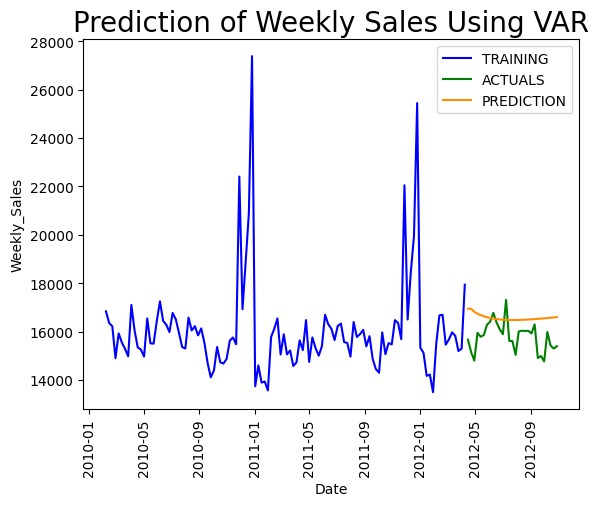

In [127]:
# Weekly_Sales
    # Training data
sns.lineplot(x=df_all_train.index, y=df_all_train['Weekly_Sales'], color='blue', label='TRAINING')
    # Actuals data
sns.lineplot(x=df_all_test.index, y=df_all_test['Weekly_Sales'], color='green', label='ACTUALS')
    # Prediction data
sns.lineplot(x=df_all_test.index, y= df_var_pred['Weekly_Sales_1d'], color='darkorange', label='PREDICTION')
    # Plot formatting
plt.title('Prediction of Weekly Sales Using VAR', fontsize=20)
plt.xticks(rotation=90)
plt.show()

#LSTM

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# เลือก features และ target variable
features = ['Fuel_Price', 'CPI', 'Close', 'GDP']
target = 'Weekly_Sales'

# ข้อมูลที่ใช้ในการเทรนและทดสอบ
X = df_all[features].values
y = df_all[target].values

# ปรับสเกลข้อมูล
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# แบ่งข้อมูลเป็นชุดเทรนและชุดทดสอบ
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# ฟังก์ชันสำหรับสร้างชุดข้อมูลต่อเนื่อง (time series dataset)
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps), :])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# กำหนดจำนวนขั้นตอนเวลา (time steps)
time_steps = 1

# สร้างชุดข้อมูลต่อเนื่อง
X_train, y_train = create_dataset(X_train, y_train, time_steps)
X_test, y_test = create_dataset(X_test, y_test, time_steps)

# สร้างโมเดล LSTM
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=100, return_sequences=False),
    Dense(units=1)
])

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='mean_squared_error')

# เทรนโมเดล
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1, verbose=1)

# ทำนาย
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

Epoch 1/100
113/113 [==============================] - 5s 12ms/step - loss: 0.0232 - val_loss: 0.0303
Epoch 2/100
113/113 [==============================] - 1s 5ms/step - loss: 0.0219 - val_loss: 0.0067
Epoch 3/100
113/113 [==============================] - 1s 5ms/step - loss: 0.0212 - val_loss: 0.0086
Epoch 4/100
113/113 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.0023
Epoch 5/100
113/113 [==============================] - 0s 4ms/step - loss: 0.0208 - val_loss: 0.0045
Epoch 6/100
113/113 [==============================] - 1s 5ms/step - loss: 0.0202 - val_loss: 0.0104
Epoch 7/100
113/113 [==============================] - 1s 5ms/step - loss: 0.0213 - val_loss: 0.0024
Epoch 8/100
113/113 [==============================] - 1s 5ms/step - loss: 0.0210 - val_loss: 0.0024
Epoch 9/100
113/113 [==============================] - 1s 5ms/step - loss: 0.0205 - val_loss: 0.0063
Epoch 10/100
113/113 [==============================] - 1s 5ms/step - loss: 0.0202 - val_l

In [129]:
# แปลงข้อมูลที่สเกลแล้วกลับเป็นค่าเดิม
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)

In [130]:
# Calcuate metrics
score_mae = mean_absolute_error(testY, testPredict)
score_mse = mean_squared_error(testY, testPredict)
score_rmse = math.sqrt(mean_squared_error(testY, testPredict))
score_mape = mean_absolute_percentage_error(testY, testPredict)

print('MAE: {}'.format(score_mae))
print('MSE: {}'.format(score_mse))
print('RMSE: {}'.format(score_rmse))
print('MAPE: {}'.format(score_mape * 100) + "%")

MAE: 801.7796441474251
MSE: 911268.7358124967
RMSE: 954.6039680477433
MAPE: 5.191377554395567%


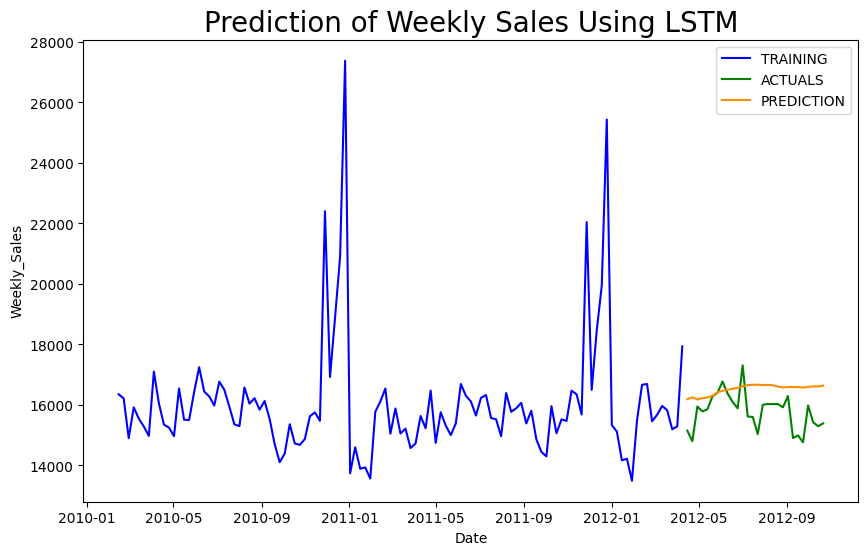

In [131]:
# พล็อตกราฟ Weekly_Sales
plt.figure(figsize=(10, 6))
plt.plot(df_all.index[time_steps:len(trainPredict)+time_steps], trainY[:,0], color='blue', label='TRAINING')#df_all.iloc[0:113, [0]]
plt.plot(df_all.index[len(trainPredict)+time_steps+time_steps-1:len(df_all)-1], testY[:,0], color='green', label='ACTUALS')
plt.plot(df_all.index[len(trainPredict)+time_steps+time_steps-1:len(df_all)-1], testPredict[:,0], color='darkorange', label='PREDICTION')
plt.title('Prediction of Weekly Sales Using LSTM', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.legend()
plt.show()

##Flask API

###Load model

In [132]:
"""
#โหลดข้อมูลก่อนนำ model ไป predict!!!
#Save model lstm 4 ปัจจัย
from tensorflow.keras.models import load_model

# บันทึกโมเดลพร้อมเลเยอร์ LSTM
model.save('model_with_lstm-input(4)(1).h5')
"""

"\n#โหลดข้อมูลก่อนนำ model ไป predict!!!\n#Save model lstm 4 ปัจจัย\nfrom tensorflow.keras.models import load_model\n\n# บันทึกโมเดลพร้อมเลเยอร์ LSTM\nmodel.save('model_with_lstm-input(4)(1).h5')\n"

####import scaler

In [133]:
"""
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# โหลดข้อมูล
# สมมติว่า df_all เป็น DataFrame ที่มีข้อมูลทั้งหมดแล้ว

# เลือก features และ target variable
features = ['Fuel_Price', 'CPI', 'Close', 'GDP']
target = 'Weekly_Sales'

# ข้อมูลที่ใช้ในการเทรนและทดสอบ
X = df_all[features].values
y = df_all[target].values

# ปรับสเกลข้อมูล
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
"""

"\nimport numpy as np\nimport pandas as pd\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense\nfrom sklearn.preprocessing import MinMaxScaler\n\n# โหลดข้อมูล\n# สมมติว่า df_all เป็น DataFrame ที่มีข้อมูลทั้งหมดแล้ว\n\n# เลือก features และ target variable\nfeatures = ['Fuel_Price', 'CPI', 'Close', 'GDP']\ntarget = 'Weekly_Sales'\n\n# ข้อมูลที่ใช้ในการเทรนและทดสอบ\nX = df_all[features].values\ny = df_all[target].values\n\n# ปรับสเกลข้อมูล\nscaler = MinMaxScaler()\nX_scaled = scaler.fit_transform(X)\n"

In [134]:
"""
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# โหลดข้อมูล
# สมมติว่า df_all เป็น DataFrame ที่มีข้อมูลทั้งหมดแล้ว

# เลือก features และ target variable
features = ['Fuel_Price', 'CPI', 'Close', 'GDP'] #'Fuel_Price', 'CPI', 'Unemployment', 'Close', 'GDP', 'PSAVERT', 'DFF'
target = 'Weekly_Sales'

# ข้อมูลที่ใช้ในการเทรนและทดสอบ
X = df_all[features].values
y = df_all[target].values

# ปรับสเกลข้อมูล
scaler_input = MinMaxScaler()
X_scaled = scaler_input.fit_transform(X)
#y_scaled = scaler.fit_transform(y.reshape(-1, 1))
"""

"\nimport numpy as np\nimport pandas as pd\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense\nfrom sklearn.preprocessing import MinMaxScaler\n\n# โหลดข้อมูล\n# สมมติว่า df_all เป็น DataFrame ที่มีข้อมูลทั้งหมดแล้ว\n\n# เลือก features และ target variable\nfeatures = ['Fuel_Price', 'CPI', 'Close', 'GDP'] #'Fuel_Price', 'CPI', 'Unemployment', 'Close', 'GDP', 'PSAVERT', 'DFF'\ntarget = 'Weekly_Sales'\n\n# ข้อมูลที่ใช้ในการเทรนและทดสอบ\nX = df_all[features].values\ny = df_all[target].values\n\n# ปรับสเกลข้อมูล\nscaler_input = MinMaxScaler()\nX_scaled = scaler_input.fit_transform(X)\n#y_scaled = scaler.fit_transform(y.reshape(-1, 1))\n"

In [135]:
"""
#scaler X y trian
import pickle
pickle.dump(scaler,open('scaler-input(4).pkl','wb'))
"""

"\n#scaler X y trian\nimport pickle\npickle.dump(scaler,open('scaler-input(4).pkl','wb'))\n"

In [136]:
"""
#scaler X_train
import pickle
pickle.dump(scaler_input,open('X_scaler-input(4).pkl','wb'))
"""

"\n#scaler X_train\nimport pickle\npickle.dump(scaler_input,open('X_scaler-input(4).pkl','wb'))\n"

#ARIMA

In [137]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

##Weekly_Sales

In [138]:
from statsmodels.tsa.stattools import adfuller
adf_results = pd.DataFrame(columns=['p-value', 'Is the series Stationary?'], index=df_all.columns)
for col in df_all.columns:
    result = adfuller(df_all[col])
    pvalue = result[1]
    if pvalue < 0.05:
        adf_results.loc[col] = [pvalue, True]
    else:
        adf_results.loc[col] = [pvalue, False]
adf_results

,p-value,Is the series Stationary?
Weekly_Sales,0.0,True
Fuel_Price,0.6474,False
CPI,0.990089,False
Close,0.9834,False
GDP,0.903749,False


**To Observe 2-weeks Rolling Mean and Std**

In [139]:
# finding 2-weeks rolling mean and std
roll_mean = df_all.rolling(window=2, center=False).mean()
roll_std = df_all.rolling(window=2, center=False).std()

**Adfuller Test**

In [140]:
result_ad = adfuller(df_all['Weekly_Sales'])

# Extract and print the results
print('ADF Statistic:', result_ad[0])
print('p-value:', result_ad[1])
print('Critical Values:', result_ad[4])

ADF Statistic: -5.930802744748703
p-value: 2.3832272706103574e-07
Critical Values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


**Auto-ARIMA MODEL**

In [141]:
train_data_uni = df_all[:int(0.8*(len(df_all)))]
test_data_uni = df_all[int(0.8*(len(df_all))):]

In [142]:
model_auto_arima = auto_arima(train_data_uni['Weekly_Sales'], trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_uni['Weekly_Sales'])

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=2056.737, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=2049.861, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=2047.325, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=2047.343, Time=0.26 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=2028.358, Time=0.56 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=2027.763, Time=0.72 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=2046.098, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=2047.442, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=2049.320, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=2051.352, Time=0.23 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=2029.658, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=2046.487, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=2048.477, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=2048.064, Time=0.79 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=2042.946, Time=0.26 sec
 ARIMA(3,0

ARIMA(maxiter=200, order=(0, 0, 5), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

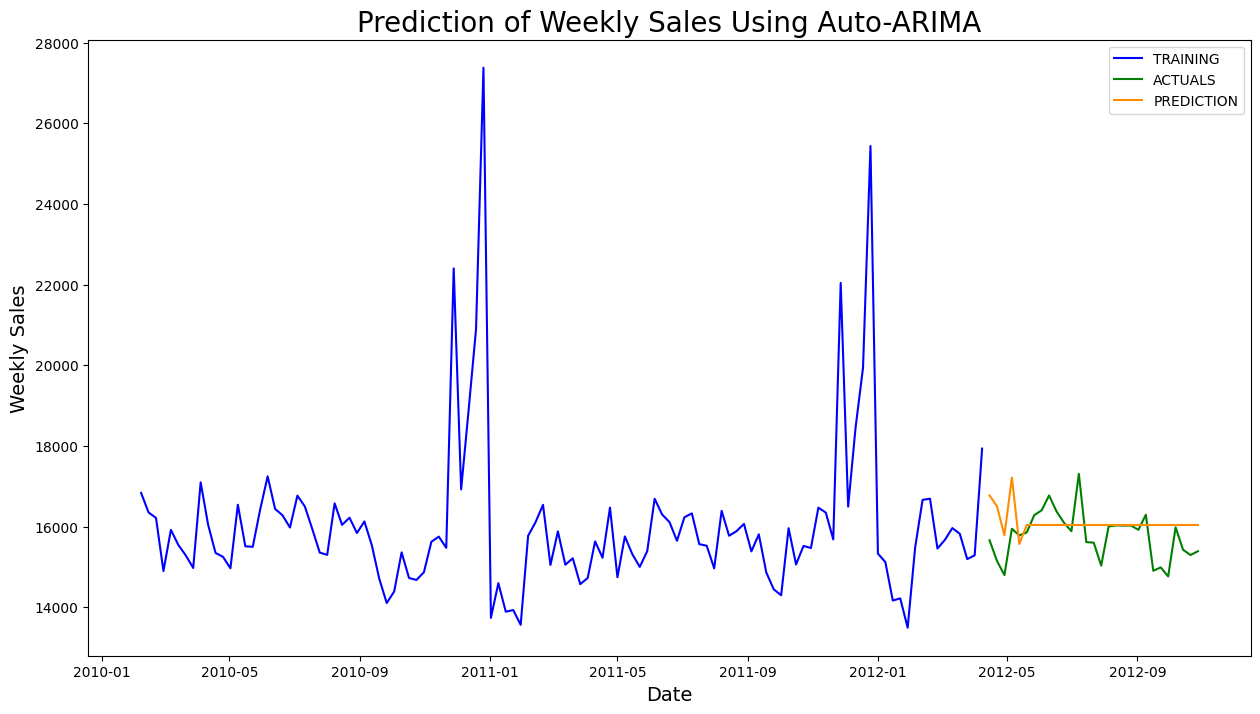

In [143]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_uni['Weekly_Sales']))
y_pred = pd.DataFrame(y_pred,index = test_data_uni.index,columns=['Prediction'])
plt.figure(figsize=(15,8))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_uni['Weekly_Sales'], color='blue', label='TRAINING')
plt.plot(test_data_uni['Weekly_Sales'], color='green', label='ACTUALS')
plt.plot(y_pred, color='darkorange', label='PREDICTION')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [144]:
score_mae = mean_absolute_error(test_data_uni['Weekly_Sales'], y_pred)
score_mse = mean_squared_error(test_data_uni['Weekly_Sales'], y_pred)
score_rmse = math.sqrt(mean_squared_error(test_data_uni['Weekly_Sales'], y_pred))
score_mape = mean_absolute_percentage_error(test_data_uni['Weekly_Sales'], y_pred)



print('MAE: {}'.format(score_mae))
print('MSE: {}'.format(score_mse))
print('RMSE: {}'.format(score_rmse))
print('MAPE: {}'.format(score_mape * 100) + "%")

MAE: 556.025354151156
MSE: 519113.0316489545
RMSE: 720.4949907174612
MAPE: 3.575325584883065%


#ExponentialSmoothing

##weekly_Sales

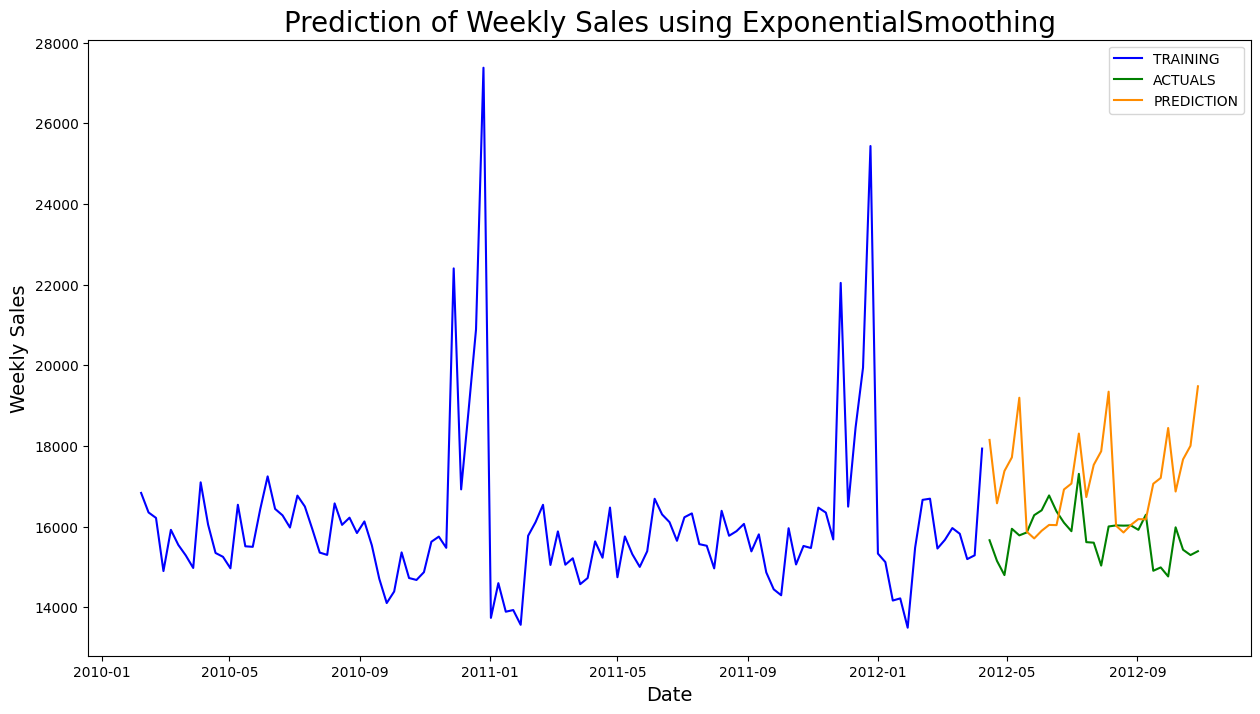

In [145]:
model_Expo = ExponentialSmoothing(train_data_uni['Weekly_Sales'], seasonal_periods=12, seasonal='additive',
                                           trend='additive',damped=True).fit()
y_pred_ex = model_Expo.forecast(len(test_data['Weekly_Sales']))

#Visualize train, test and predicted data.
plt.figure(figsize=(15,8))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_uni['Weekly_Sales'], color='blue', label='TRAINING')
plt.plot(test_data_uni['Weekly_Sales'], color='green', label='ACTUALS')
plt.plot(y_pred_ex, color='darkorange', label='PREDICTION')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [146]:
# Calcuate metrics
score_mae = mean_absolute_error(test_data_uni['Weekly_Sales'], y_pred_ex)
score_mse = mean_squared_error(test_data_uni['Weekly_Sales'], y_pred_ex)
score_rmse = math.sqrt(mean_squared_error(test_data_uni['Weekly_Sales'], y_pred_ex))
score_mape = mean_absolute_percentage_error(test_data_uni['Weekly_Sales'], y_pred_ex)



print('MAE: {}'.format(score_mae))
print('MSE: {}'.format(score_mse))
print('RMSE: {}'.format(score_rmse))
print('MAPE: {}'.format(score_mape * 100) + "%")

MAE: 1538.9132811108493
MSE: 3835693.5053448975
RMSE: 1958.492661549922
MAPE: 9.941866398885782%


#Prophet

In [147]:
#แปลง Index เป็น Date
df_all_pro = df_all.reset_index()

In [148]:
df_all_pro.head(2)

,Date,Weekly_Sales,Fuel_Price,CPI,Close,GDP
0,2010-02-07,16836.121997,2.717869,167.398405,53.532001,14764.611
1,2010-02-14,16352.056032,2.696102,167.384138,53.080001,14764.611


In [149]:
from prophet import Prophet
feature_columns = [
    'Fuel_Price',
    'CPI',
    #'Unemployment',
    'Close',
    'GDP',
    #'PSAVERT',
    #'DFF',
]
target_column = ['Weekly_Sales']

train_size_all = int(0.80 * len(df_all_pro))

multivariate_df_all = df_all_pro[['Date'] + target_column + feature_columns].copy()
multivariate_df_all.columns = ['ds', 'y'] + feature_columns

train_all = multivariate_df_all.iloc[:train_size_all, :]
x_train_all, y_train_all = pd.DataFrame(multivariate_df_all.iloc[:train_size_all, [0,2,3,4,5,]]), pd.DataFrame(multivariate_df_all.iloc[:train_size_all, 1])
x_valid_all, y_valid_all = pd.DataFrame(multivariate_df_all.iloc[train_size_all:, [0,2,3,4,5]]), pd.DataFrame(multivariate_df_all.iloc[train_size_all:, 1])

train_all.head()

,ds,y,Fuel_Price,CPI,Close,GDP
0,2010-02-07,16836.121997,2.717869,167.398405,53.532001,14764.611
1,2010-02-14,16352.056032,2.696102,167.384138,53.080001,14764.611
2,2010-02-21,16216.658979,2.673666,167.338966,53.645001,14764.611
3,2010-02-28,14899.549688,2.685642,167.691019,53.918000,14764.611
4,2010-03-07,15921.015727,2.731816,167.727351,53.850000,14764.611


##Weekly_Sales

In [150]:
# Train the model
model_pro = Prophet()
model_pro.add_regressor('Fuel_Price')
model_pro.add_regressor('CPI')
#model_pro.add_regressor('Unemployment')
model_pro.add_regressor('Close')
model_pro.add_regressor('GDP')
#model_pro.add_regressor('PSAVERT')
#model_pro.add_regressor('DFF')

# Fit the model with train set
model_pro.fit(train_all)

# Predict on valid set
y_pred_pro = model_pro.predict(x_valid_all)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid_all, y_pred_pro['yhat'])
score_mse = mean_squared_error(y_valid_all, y_pred_pro['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid_all, y_pred_pro['yhat']))
score_mape = mean_absolute_percentage_error(y_valid_all, y_pred_pro['yhat'])



print('MAE: {}'.format(score_mae))
print('MSE: {}'.format(score_mse))
print('RMSE: {}'.format(score_rmse))
print('MAPE: {}'.format(score_mape * 100) + "%")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2293bmjb/yymgjc5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2293bmjb/yarnbo1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86698', 'data', 'file=/tmp/tmp2293bmjb/yymgjc5n.json', 'init=/tmp/tmp2293bmjb/yarnbo1q.json', 'output', 'file=/tmp/tmp2293bmjb/prophet_modelg29q_3zv/prophet_model-20240426174316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:43:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:43:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 677.5705077633595
MSE: 651797.8904392901
RMSE: 807.3400091902358
MAPE: 4.3034667309127155%


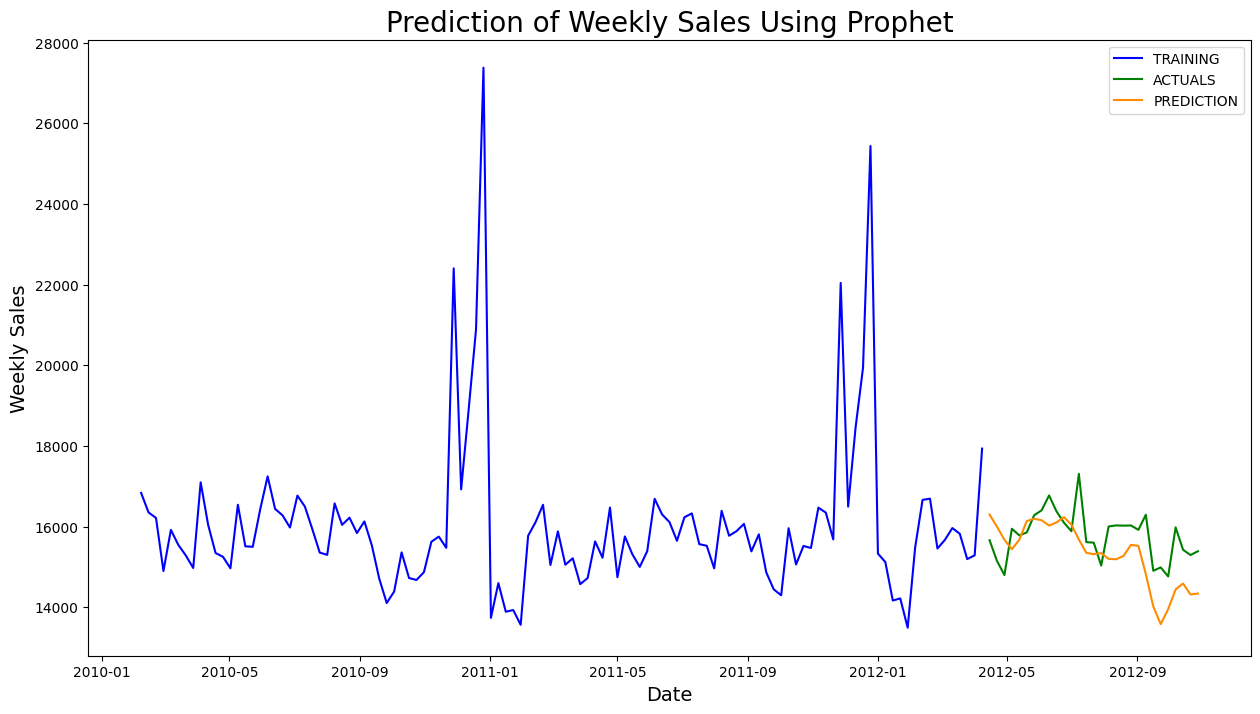

In [151]:
# Weekly_Sales
plt.figure(figsize=(15,8))
plt.title('Prediction of Weekly Sales Using Prophet', fontsize=20)
plt.plot(x_train_all['ds'], y_train_all['y'], color='blue', label='TRAINING')
plt.plot(x_valid_all['ds'], y_valid_all['y'], color='green', label='ACTUALS')
plt.plot(x_valid_all['ds'], y_pred_pro['yhat'], color='darkorange', label='PREDICTION')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

##Futue

In [152]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# สร้างโมเดล Prophet
model_pro = Prophet()

# ปรับปรุงข้อมูลเพื่อให้เป็นรูปแบบที่ Prophet ต้องการ
df_all_pro = df_all_pro.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# ฟิตโมเดลโดยใช้ข้อมูล
model_pro.fit(df_all_pro)

# ทำนายผลลัพธ์
future = model_pro.make_future_dataframe(periods=120)
forecast = model_pro.predict(future)

plot_plotly(model_pro, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2293bmjb/b_pqlx9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2293bmjb/xqp1227a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58496', 'data', 'file=/tmp/tmp2293bmjb/b_pqlx9q.json', 'init=/tmp/tmp2293bmjb/xqp1227a.json', 'output', 'file=/tmp/tmp2293bmjb/prophet_modeln9hbrih3/prophet_model-20240426174317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:43:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:43:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [153]:
#แปลงชื่อคอลัมน์กลับ
df_all_pro = df_all_pro.rename(columns={'ds': 'Date', 'y': 'Weekly_Sales'})

In [154]:
# สร้างโมเดล Prophet
model_pro = Prophet()

# ปรับปรุงข้อมูลเพื่อให้เป็นรูปแบบที่ Prophet ต้องการ
df_all_pro = df_all_pro.rename(columns={'Date': 'ds', 'Close': 'y'})

# ฟิตโมเดลโดยใช้ข้อมูล
model_pro.fit(df_all_pro)

# ทำนายผลลัพธ์
future = model_pro.make_future_dataframe(periods=120)
forecast = model_pro.predict(future)

plot_plotly(model_pro, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2293bmjb/s4w87l8d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2293bmjb/1t9yidnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36715', 'data', 'file=/tmp/tmp2293bmjb/s4w87l8d.json', 'init=/tmp/tmp2293bmjb/1t9yidnd.json', 'output', 'file=/tmp/tmp2293bmjb/prophet_modelk_w7_sfh/prophet_model-20240426174318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:43:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
